### P3 Wine Manual Impl

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from urllib.request import urlretrieve

In [17]:
def load_wine_data():
    train_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
    urlretrieve(train_url, "wine_train.data")

    data = np.loadtxt("wine_train.data", delimiter=",")

    labels = data[:, 0].astype(int) - 1
    features = data[:, 1:]

    scaler = StandardScaler()
    features = scaler.fit_transform(features)

    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

    return X_train, y_train, X_test, y_test

In [22]:
class Wine_Classifier:
    def __init__(self, input_size=13, hidden_size=10, output_size=3, learning_rate=0.1):
        """
        Neural Network Initialization:
        13 Input features > K hidden neurons > 3 output classes
        """
        self.learning_rate = learning_rate
        np.random.seed(42)

        # input -> hidden
        self.W1 = np.random.randn(input_size, hidden_size) * 0.5
        self.b1 = np.zeros((1, hidden_size))

        # hidden -> output 
        self.W2 = np.random.randn(hidden_size, output_size) * 0.5
        self.b2 = np.zeros((1, output_size))

        # one hot encoding:
        self.encoder = OneHotEncoder(sparse_output = False)

        self.z1 = None
        self.a1 = None
        self.z2 = None
        self.a2 = None

        self.loss_history = []

    def sigmoid(self, X):
        return 1/(1 + np.exp(-X))

    def sigmoid_derivative(self, X):
        s = self.sigmoid(X)
        return s * (1-s)
    
    def one_hot_encode(self, y, num_classes=3):
        n = len(y)
        one_hot = np.zeros((n, num_classes))
        one_hot[np.arange(n), y] = 1
        return one_hot

    def forward(self, X):
        """Forward Pass"""
        self.z1 = X @ self.W1 + self.b1
        self.a1 = self.sigmoid(self.z1)

        self.z2 = self.a1 @ self.W2 + self.b2
        self.a2 = self.sigmoid(self.z2)

        return self.a2

    def compute_loss(self, y_true, y_pred):
        """mse calculation"""
        m = y_true.shape[0]
        loss = np.mean((y_pred - y_true) ** 2)
        return loss

    def backward(self, X, y_true, y_pred):
        """Backward Pass"""
        m = X.shape[0]

        # output layer gradients
        delta2 = (y_pred - y_true) * self.sigmoid_derivative(self.z2)
        dW2 = (self.a1.T @ delta2) / m
        db2 = np.mean(delta2, axis=0, keepdims=True)

        # hidden layer gradients
        delta1 = (delta2 @ self.W2.T) * self.sigmoid_derivative(self.z1)
        dW1 = (X.T @ delta1) / m
        db1 = np.mean(delta1, axis=0, keepdims=True)

        return dW1, db1, dW2, db2

    def update_weights(self, dW1, db1, dW2, db2):
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2

    def train(self, X_train, y_train, epochs = 10000):
        y_train_reshape = y_train.reshape(-1,1)
        y_train_one_hot = self.encoder.fit_transform(y_train_reshape)

        for epoch in range(epochs):
            # forward pass:
            y_pred = self.forward(X_train)

            # compute loss:
            loss = mean_squared_error(y_train_one_hot, y_pred)
            self.loss_history.append(loss)

            # backward loss:
            dW1, db1, dW2, db2 = self.backward(X_train, y_train_one_hot, y_pred)

            # update the weights:
            self.update_weights(dW1, db1, dW2, db2)

            if epoch % 100 == 0:
                accuracy = self.calculate_accuracy(X_train, y_train)
                print(f"Epoch {epoch}: Loss = {loss:.4f}, Train Accuracy = {accuracy:.2f}%")

    def predict(self, X):
        output = self.forward(X)
        return np.argmax(output, axis=1)
    
    def calculate_accuracy(self, X, y):
        predictions = self.predict(X)
        accuracy = np.mean(predictions == y) * 100
        return accuracy

PROBLEM 3: Wine Classification with Square Loss

Training with 5 hidden neurons
Epoch 0: Loss = 0.2417, Train Accuracy = 68.31%
Epoch 100: Loss = 0.0815, Train Accuracy = 96.48%
Epoch 200: Loss = 0.0411, Train Accuracy = 97.89%
Epoch 300: Loss = 0.0271, Train Accuracy = 97.89%
Epoch 400: Loss = 0.0197, Train Accuracy = 99.30%
Epoch 500: Loss = 0.0145, Train Accuracy = 99.30%
Epoch 600: Loss = 0.0115, Train Accuracy = 99.30%
Epoch 700: Loss = 0.0096, Train Accuracy = 100.00%
Epoch 800: Loss = 0.0082, Train Accuracy = 100.00%
Epoch 900: Loss = 0.0071, Train Accuracy = 100.00%

Final Results with 5 hidden neurons:
Training Accuracy: 100.00%
Test Accuracy: 100.00%


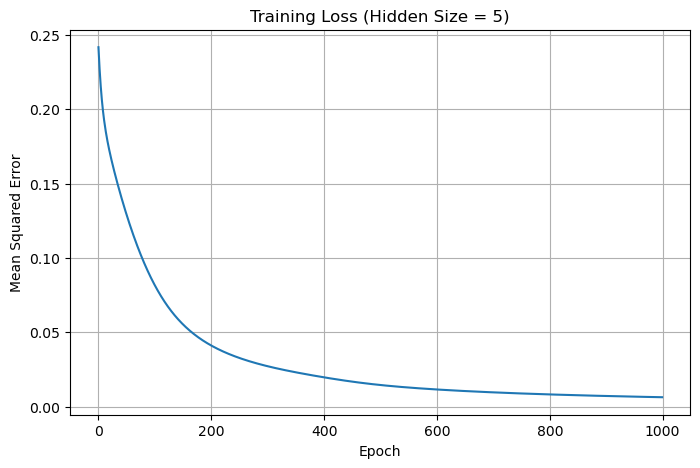


Training with 10 hidden neurons
Epoch 0: Loss = 0.3168, Train Accuracy = 28.17%
Epoch 100: Loss = 0.0701, Train Accuracy = 97.89%
Epoch 200: Loss = 0.0358, Train Accuracy = 98.59%
Epoch 300: Loss = 0.0231, Train Accuracy = 99.30%
Epoch 400: Loss = 0.0171, Train Accuracy = 99.30%
Epoch 500: Loss = 0.0137, Train Accuracy = 99.30%
Epoch 600: Loss = 0.0114, Train Accuracy = 99.30%
Epoch 700: Loss = 0.0098, Train Accuracy = 99.30%
Epoch 800: Loss = 0.0086, Train Accuracy = 100.00%
Epoch 900: Loss = 0.0076, Train Accuracy = 100.00%

Final Results with 10 hidden neurons:
Training Accuracy: 100.00%
Test Accuracy: 100.00%


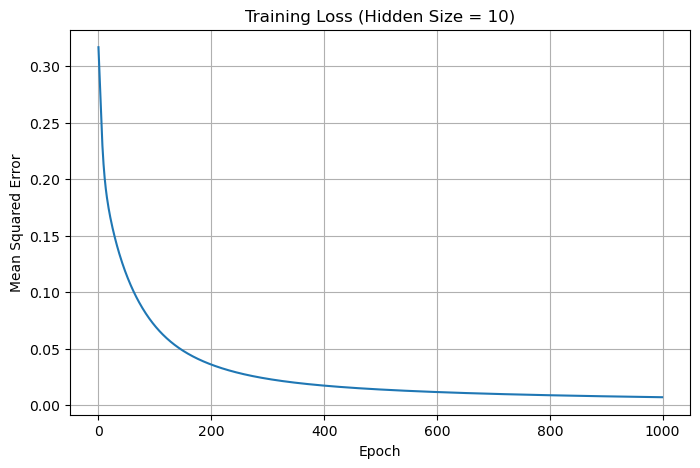


Training with 20 hidden neurons
Epoch 0: Loss = 0.3698, Train Accuracy = 31.69%
Epoch 100: Loss = 0.0519, Train Accuracy = 97.18%
Epoch 200: Loss = 0.0284, Train Accuracy = 97.89%
Epoch 300: Loss = 0.0198, Train Accuracy = 97.89%
Epoch 400: Loss = 0.0153, Train Accuracy = 98.59%
Epoch 500: Loss = 0.0124, Train Accuracy = 98.59%
Epoch 600: Loss = 0.0105, Train Accuracy = 99.30%
Epoch 700: Loss = 0.0090, Train Accuracy = 99.30%
Epoch 800: Loss = 0.0079, Train Accuracy = 99.30%
Epoch 900: Loss = 0.0071, Train Accuracy = 99.30%

Final Results with 20 hidden neurons:
Training Accuracy: 100.00%
Test Accuracy: 100.00%


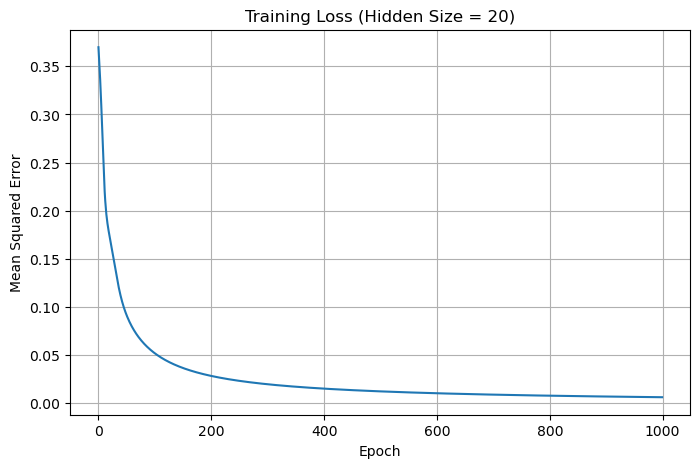

In [23]:
if __name__ == "__main__":
    print("PROBLEM 3: Wine Classification with Square Loss")
    print("=" * 60)

    X_train, y_train, X_test, y_test = load_wine_data()
    hidden_sizes = [5, 10, 20]

    for hidden_size in hidden_sizes:
        print(f"\n" + "=" * 60)
        print(f"Training with {hidden_size} hidden neurons")
        print("=" * 60)
        
        # Create and train model
        model = Wine_Classifier(input_size=13, hidden_size=hidden_size, 
                              output_size=3, learning_rate=0.5)
        model.train(X_train, y_train, epochs=1000)
        
        # Evaluate on test set
        train_accuracy = model.calculate_accuracy(X_train, y_train)
        test_accuracy = model.calculate_accuracy(X_test, y_test)
        
        print(f"\nFinal Results with {hidden_size} hidden neurons:")
        print(f"Training Accuracy: {train_accuracy:.2f}%")
        print(f"Test Accuracy: {test_accuracy:.2f}%")

        plt.figure(figsize=(8, 5))
        plt.plot(model.loss_history)
        plt.title(f'Training Loss (Hidden Size = {hidden_size})')
        plt.xlabel('Epoch')
        plt.ylabel('Mean Squared Error')
        plt.grid(True)
        plt.show()

The network learns to identify wine types based on their chemical properties. it takes 13 measurements (like alcohol content, acidity etc) and predicts which of 3 wines types it is. Through backpropagation, the network adjusts its weights to make minimum prediction errors using square loss. Here the hidden layer discovers the important patterns that distinguish one wine type from another. 